# Задание 1

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.
 

Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

In [ ]:
import numpy as np

def linan(str1,str2) :
    t = np.array([str1.split(), str2.split()],  dtype = np.float64)
    M = t[0:2, 0:2]
    b = t[0:2, 2:3].ravel()
    return ' '.join(np.linalg.solve(M, b).astype(str))

print(linan('1 209 3', '3 44 5'))

1.5660377358490567 0.0068610634648370505


# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

Нужно сделать без использования  циклов.

```
# ожидаемый резальтат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```



In [ ]:
def decorate_matrix(n) :
    M = np.ones((n, n))
    M[1:-1, 1:-1] = 0
    return M

decorate_matrix(5)

array([[1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1.]])

# Задание 3

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$ 

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример. 
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

In [ ]:
class find_min :
    def __init__(self, a, b) -> None :
        self.a = a
        self.b = b
    
    def f(self, x) -> np.float32 :
        return (x + self.a)**2 - self.b

    def g(self, x) -> np.float32 :
        return abs(self.f(x))
    
    #Метод золотого сечения
    def goldenRatioMethod(self, a, b, eps, func) -> np.float32 :
        goldenRatioConstant = 0.5 * (3 - np.sqrt(5))
        x1 = a + goldenRatioConstant * abs(b - a)
        x2 = b - goldenRatioConstant * abs(b - a)
        f1 = func(x1)
        f2 = func(x2)
        while (abs(b - a) >= eps) :
            if (f1 < f2) :
                b = x2
                x2 = x1
                f2 = f1
                x1 = a + goldenRatioConstant * abs(b - a)
                f1 = func(x1)
            else :
                a = x1
                x1 = x2
                f1 = f2
                x2 = b - goldenRatioConstant * abs(b - a)
                f2 = func(x2)       
        return round(0.5 * (b + a), 2)
    
    def find_f_min(self) -> np.float32 :
        return -1.0 * self.a
    
    def find_g_min(self) -> np.float32 :
        eps = 0.001
        tip = self.find_f_min()
        x1 = self.goldenRatioMethod(tip - self.b, tip, eps, self.g)
        x2 = self.goldenRatioMethod(tip, self.b + tip, eps, self.g)
        return x1, x2
    
method = find_min(5, 12)
x_f = method.find_f_min()
x_g = method.find_g_min()

print(x_f)
print(x_g)

-5.0
(-8.46, -1.54)


# Задание 4

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

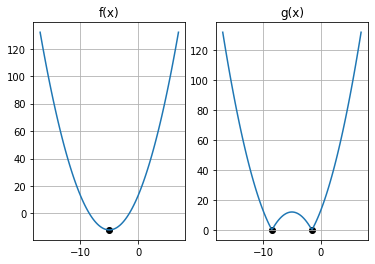

In [ ]:
import matplotlib.pyplot as plt

range_for_plot = -method.a - method.b, -method.a + method.b 

fig, axs = plt.subplots(1, 2)
axs[0].grid(True)
axs[1].grid(True)

x = np.linspace(range_for_plot[0], range_for_plot[1], 100)
y1 = list(map(method.f, x))
y2 = list(map(method.g, x))

axs[0].set(title='f(x)')
axs[0].plot(x, y1)
axs[0].scatter([x_f], [method.f(x_f)], color = 'black')

axs[1].set(title='g(x)')
axs[1].plot(x, y2)
axs[1].scatter([x_g[0], x_g[1]], [method.g(x_g[0]), method.g(x_g[1])], color = 'black')

# Задание 5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)? 
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)? 
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

In [ ]:
import random

participants_count = 1000
test_count = 1000

In [ ]:
res = 0
for test in range(test_count) :
    flag = False
    for i in range(participants_count) :
        summ = 0
        for j in range(10) :
            summ += random.randint(0, 1)
        if summ == 0 or summ == 10 :
            flag = True
            break
    if (flag) :
        res += 1
print(res / test_count)

0.879


In [ ]:
res = 0
for test in range(test_count) :
    flag = False
    for i in range(participants_count) :
        last = random.randint(0, 1)
        summ = 1
        for j in range(9) :
            cur = random.randint(0, 1)
            if (cur == last) :
                summ += 1
            elif (summ == 8) :
                break
            else :
                summ = 1
                last = cur
        if (summ == 8) :
            flag = True
            break
    if (flag) :
        res += 1 
print(res / test_count)

1.0


In [ ]:
res = 0
for test in range(test_count) :
    good_count = 0
    for i in range(participants_count) :
        summ = 0
        for j in range(10) :
            summ += random.randint(0, 1)
        if summ == 0 or summ == 10 :
            good_count += 1
    if (good_count == 3) :
        res += 1 
print(res / test_count)

0.16
